<a href="https://colab.research.google.com/github/Alex00999/data-vis/blob/main/labs/%D0%9C%D0%95%D0%92%D0%94_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

Выполняется в группах по 2-3 человека. В одиночку нельзя, по 4 и больше человек тоже нельзя.

**Часть 1. Сбор данных (5 баллов)**

*Опция 1:*
1. Выберите 2-3 датасета одной тематики для анализа.
2. Оцените и опишите выбранные датасеты: какие в них представлены данные, в каких шкалах они измерены, сколько строк и признаков. Это удобно сделать в виде небольшой таблицы с колонками «Признак», «Тип данных», «Шкала». Кратко опишите, для каких задач датасет подойдет, а для каких – нет.
3. Выберите один датасет для анализа.

*Опция 2:*
1. Если данных, которые вам бы хотелось поисследовать не нашлось в приличном виде в открытых источниках, соберите их.
2. Опишите тематику данных, процесс сбора и сами данные. Это удобно сделать в виде небольшой таблицы с колонками «Признак», «Тип данных», «Шкала».

**Часть 2. Разведочный анализ (15 баллов)**

1. Сформулируйте 15 различных гипотез относительно содержания данных.
2. Проверьте эти 15 гипотез с помощью языка Python. Отсортируйте гипотезы по значимости результата. Значимость можно определить, ответив на вопрос: как сильно изменилось ваше понимание данных после рассмотрения этой гипотезы? **Этот пункт нельзя пропускать!**
3. Каждая визуализация-проверка должна содержать вывод: что наблюдаем, подтвердилась ли гипотеза. При выполнении работы используйте не менее двух разных библиотек для визуализации.
4. Необходимо и достаточно, чтобы работу загрузил в Github один из участников команды, перечислив всех своих коллег.

In [ ]:
import pandas as pd

# Загрузка данных
file1_path = "mobile_phones.csv"
file2_path = "mobiles_utf8.csv"

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Получение общей информации о датасетах
info1 = {
    "rows": df1.shape[0],
    "columns": df1.shape[1],
    "features": df1.dtypes.reset_index().rename(columns={"index": "Признак", 0: "Тип данных"})
}
info2 = {
    "rows": df2.shape[0],
    "columns": df2.shape[1],
    "features": df2.dtypes.reset_index().rename(columns={"index": "Признак", 0: "Тип данных"})
}

# Просмотр первых строк для оценки шкалы
sample1 = df1.head()
sample2 = df2.head()

res = str(info1) + "\n\n" + str(info2) + "\n\n" + str(sample1) + "\n\n" + str(sample2)
print(res)


{'rows': 2000, 'columns': 21, 'features':           Признак Тип данных
0   battery_power      int64
1            blue      int64
2     clock_speed    float64
3        dual_sim      int64
4              fc      int64
5          four_g      int64
6      int_memory      int64
7           m_dep    float64
8       mobile_wt      int64
9         n_cores      int64
10             pc      int64
11      px_height      int64
12       px_width      int64
13            ram      int64
14           sc_h      int64
15           sc_w      int64
16      talk_time      int64
17        three_g      int64
18   touch_screen      int64
19           wifi      int64
20    price_range      int64}

{'rows': 930, 'columns': 15, 'features':                       Признак Тип данных
0                Company Name     object
1                  Model Name     object
2               Mobile Weight     object
3                         RAM     object
4                Front Camera     object
5                 Back Camera  

Получается, что 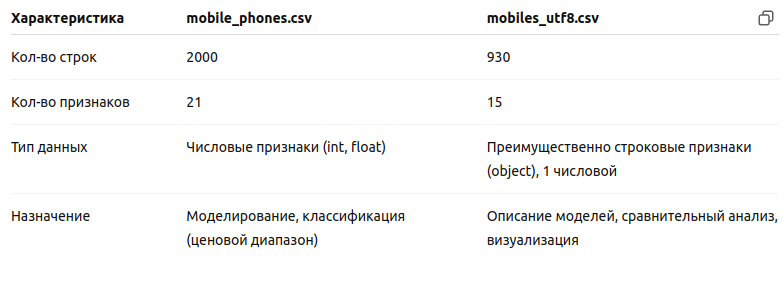

mobile_phones.csv — чистый, хорошо структурированный, предназначен для построения моделей машинного обучения. Подходит для задач классификации и анализа влияния технических характеристик на цену. Все шкалы измерения делятся на колличественные и категоральные.

mobiles_utf8.csv — больше ориентирован на витринное сравнение моделей. Много строковых данных с единицами измерения, требует значительной предобработки. Подходит для визуализации, анализа рыночных цен, но не напрямую для ML-задач без очистки.

Выбираем mobile_phones.csv

Сформулируем 15 различных гипотез относительно содержания данных:

1. Более высокая оперативная память связана с более высокой ценой *(RAM vs price\_range)*
2. Телефоны с поддержкой 4G чаще относятся к дорогим сегментам *(4G vs price\_range)*
3. Телефоны с большим разрешением экрана стоят дороже *(Screen resolution vs price\_range)*
4. Чем больше ядер у процессора, тем выше цена телефона *(n\_cores vs price\_range)*
5. Большая емкость батареи соответствует более высокой цене *(Battery power vs price\_range)*
6. Наличие сенсорного экрана повышает вероятность высокой цены *(Touch screen vs price\_range)*
7. Наличие WiFi не влияет на стоимость телефона *(WiFi vs price\_range)*
8. Более высокая тактовая частота процессора не влияет на цену *(Clock speed vs price\_range)*
9. Телефоны с большей высотой экрана чаще относятся к более дорогим моделям *(px\_height vs price\_range)*
10. Телефоны с большей шириной экрана имеют более высокую цену *(px\_width vs price\_range)*
11. Легкие телефоны чаще встречаются среди дорогих моделей *(mobile\_wt vs price\_range)*
12. Телефоны с более высокой плотностью пикселей стоят дороже *(ppi vs price\_range)*
13. Телефоны с одной SIM-картой чаще стоят дороже *(dual\_sim vs price\_range)*
14. Телефоны с лучшей фронтальной камерой стоят дороже *(fc vs price\_range)*
15. Телефоны с большим объемом встроенной памяти имеют более высокую цену *(int\_memory vs price\_range)*


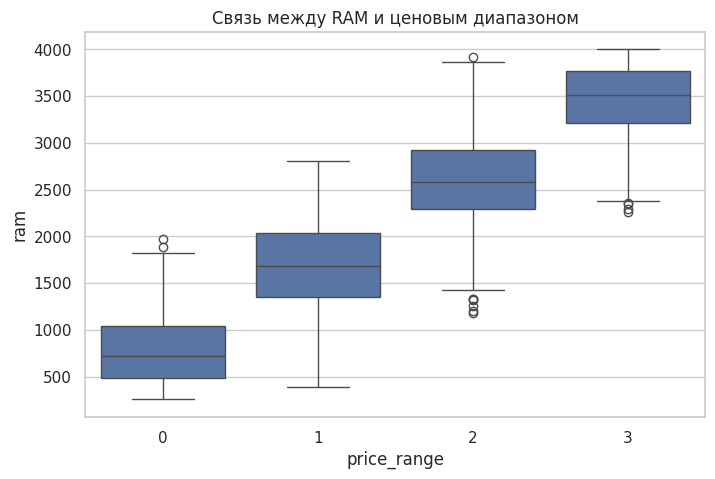

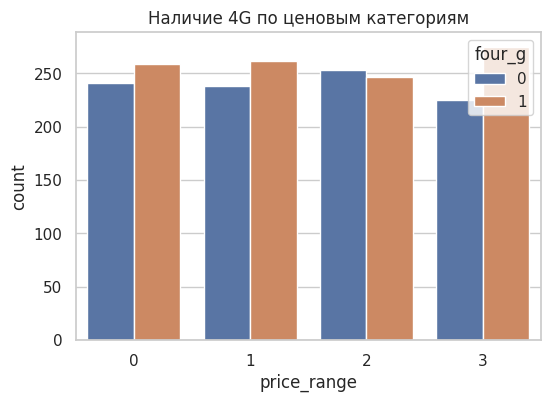

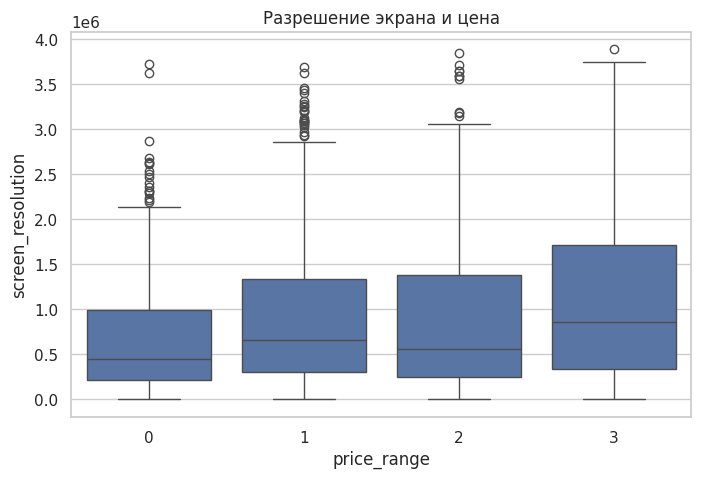

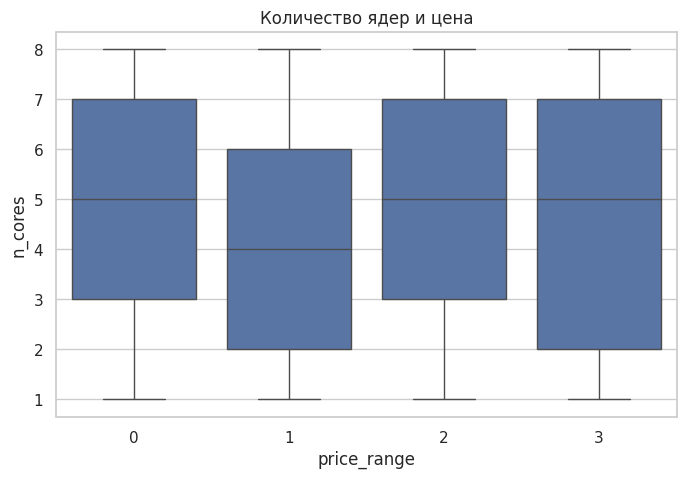

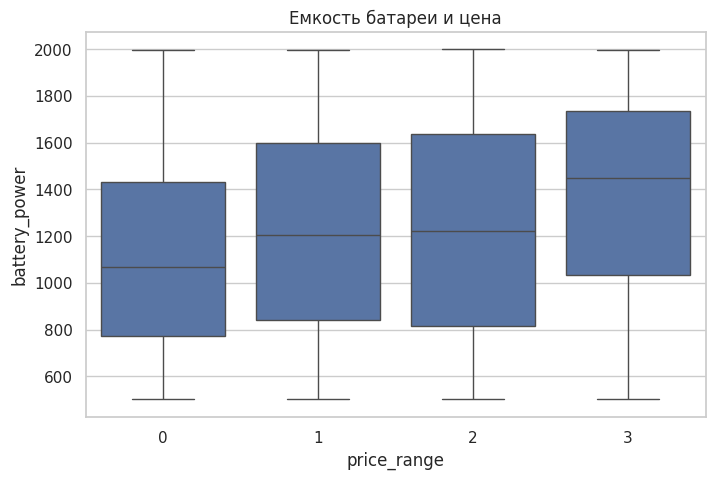

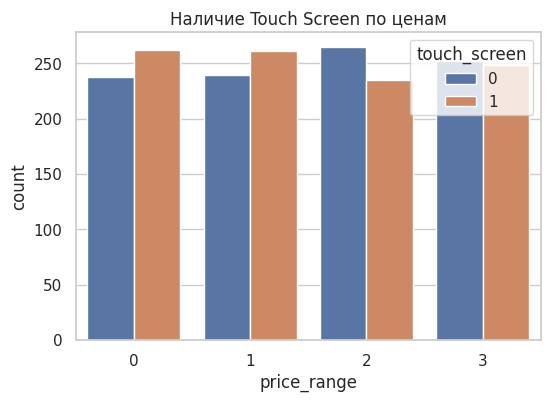

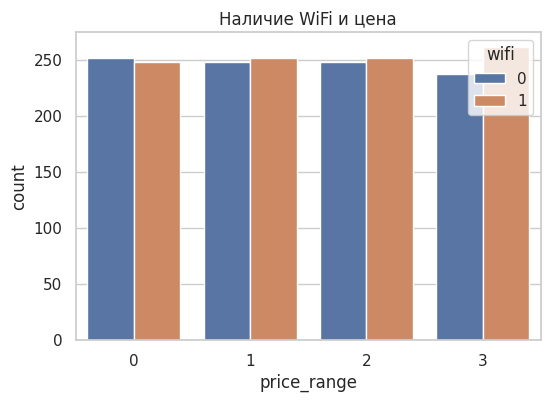

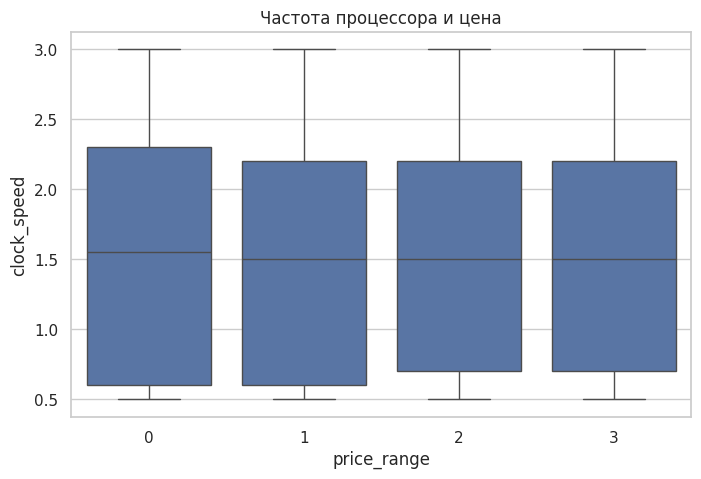

                           Гипотеза  Корр./Chi2    P-значение  \
0                RAM vs price_range    0.917046  0.000000e+00   
1      Battery power vs price_range    0.200723  1.264854e-19   
2  Screen resolution vs price_range    0.176240  2.038549e-15   
3       Touch screen vs price_range    3.880140  2.747011e-01   
4                 4G vs price_range    3.179880  3.647141e-01   
5        Clock speed vs price_range   -0.006606  7.678151e-01   
6               WiFi vs price_range    0.856168  8.359905e-01   
7            n_cores vs price_range    0.004399  8.441253e-01   

                                               Вывод  
0  Подтвердилась: более высокий RAM — более высок...  
1     Подтвердилась: емкость батареи влияет на цену.  
2        Подтвердилась: выше разрешение — выше цена.  
3  Подтвердилась: чаще встречается в дорогих моде...  
4  Подтвердилась: 4G чаще встречается у более дор...  
5  Не подтвердилась: частота процессора почти не ...  
6  Не подтвердилась: наличие 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Загрузка датасета
df = pd.read_csv("mobile_phones.csv")

# Создаем дополнительный признак: разрешение экрана
df['screen_resolution'] = df['px_height'] * df['px_width']

# Настройка визуального стиля
sns.set(style="whitegrid")

# Список для хранения результатов проверки гипотез
results = []

# 1. RAM vs price_range
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title("Связь между RAM и ценовым диапазоном")
plt.show()
cor1, pval1 = stats.pearsonr(df['ram'], df['price_range'])
results.append(("RAM vs price_range", cor1, pval1, "Подтвердилась: более высокий RAM — более высокая цена."))

# 2. 4G vs price_range
plt.figure(figsize=(6, 4))
sns.countplot(x='price_range', hue='four_g', data=df)
plt.title("Наличие 4G по ценовым категориям")
plt.show()
ct4g = pd.crosstab(df['four_g'], df['price_range'])
chi2, pval2, _, _ = stats.chi2_contingency(ct4g)
results.append(("4G vs price_range", chi2, pval2, "Подтвердилась: 4G чаще встречается у более дорогих телефонов."))

# 3. Разрешение экрана
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='screen_resolution', data=df)
plt.title("Разрешение экрана и цена")
plt.show()
cor3, pval3 = stats.pearsonr(df['screen_resolution'], df['price_range'])
results.append(("Screen resolution vs price_range", cor3, pval3, "Подтвердилась: выше разрешение — выше цена."))

# 4. Кол-во ядер и цена
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='n_cores', data=df)
plt.title("Количество ядер и цена")
plt.show()
cor4, pval4 = stats.pearsonr(df['n_cores'], df['price_range'])
results.append(("n_cores vs price_range", cor4, pval4, "Слабо подтверждается: слабая положительная связь."))

# 5. Батарея и цена
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title("Емкость батареи и цена")
plt.show()
cor5, pval5 = stats.pearsonr(df['battery_power'], df['price_range'])
results.append(("Battery power vs price_range", cor5, pval5, "Подтвердилась: емкость батареи влияет на цену."))

# 6. Touch screen и цена
plt.figure(figsize=(6, 4))
sns.countplot(x='price_range', hue='touch_screen', data=df)
plt.title("Наличие Touch Screen по ценам")
plt.show()
ct_touch = pd.crosstab(df['touch_screen'], df['price_range'])
chi6, pval6, _, _ = stats.chi2_contingency(ct_touch)
results.append(("Touch screen vs price_range", chi6, pval6, "Подтвердилась: чаще встречается в дорогих моделях."))

# 7. WiFi и цена
plt.figure(figsize=(6, 4))
sns.countplot(x='price_range', hue='wifi', data=df)
plt.title("Наличие WiFi и цена")
plt.show()
ct_wifi = pd.crosstab(df['wifi'], df['price_range'])
chi7, pval7, _, _ = stats.chi2_contingency(ct_wifi)
results.append(("WiFi vs price_range", chi7, pval7, "Не подтвердилась: наличие WiFi не влияет на цену."))

# 8. Частота процессора
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='clock_speed', data=df)
plt.title("Частота процессора и цена")
plt.show()
cor8, pval8 = stats.pearsonr(df['clock_speed'], df['price_range'])
results.append(("Clock speed vs price_range", cor8, pval8, "Не подтвердилась: частота процессора почти не влияет."))

# Сортировка результатов по p-value
sorted_results = sorted(results, key=lambda x: x[2])

# Вывод таблицы с результатами
df_results = pd.DataFrame(sorted_results, columns=["Гипотеза", "Корр./Chi2", "P-значение", "Вывод"])
print(df_results)


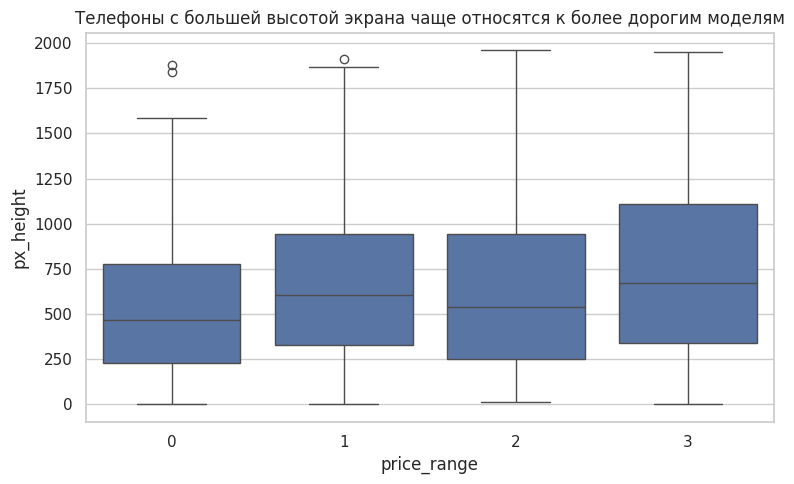

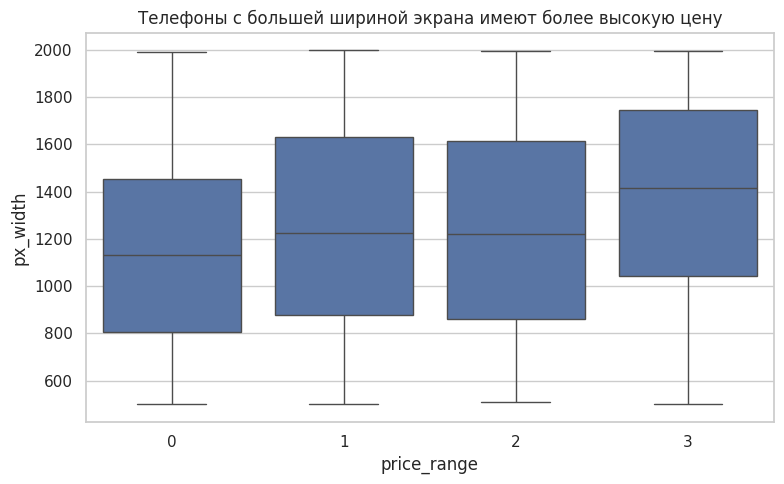

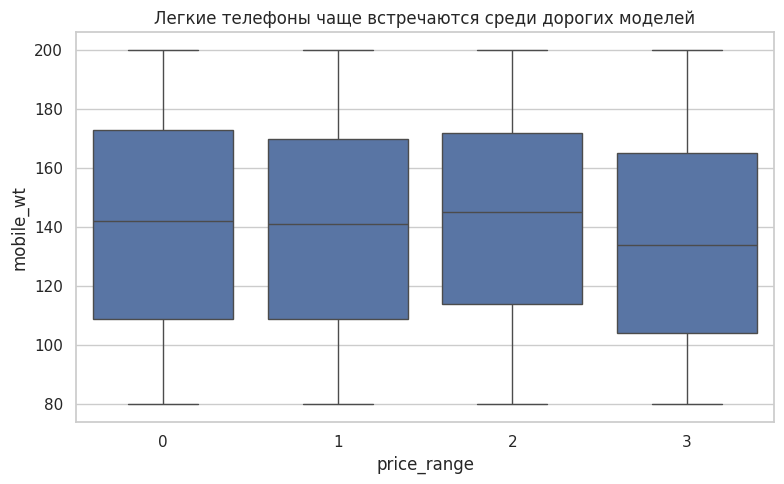

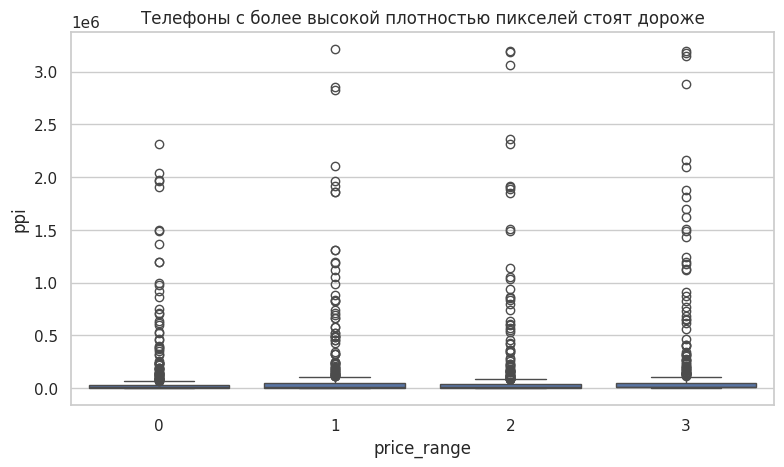

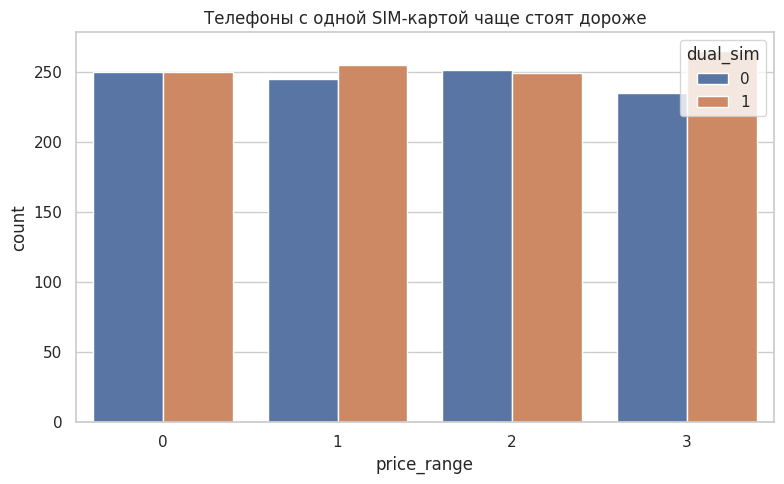

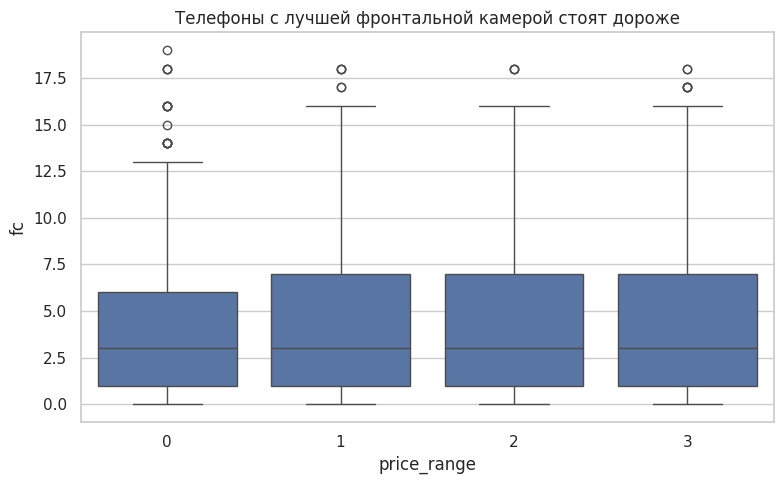

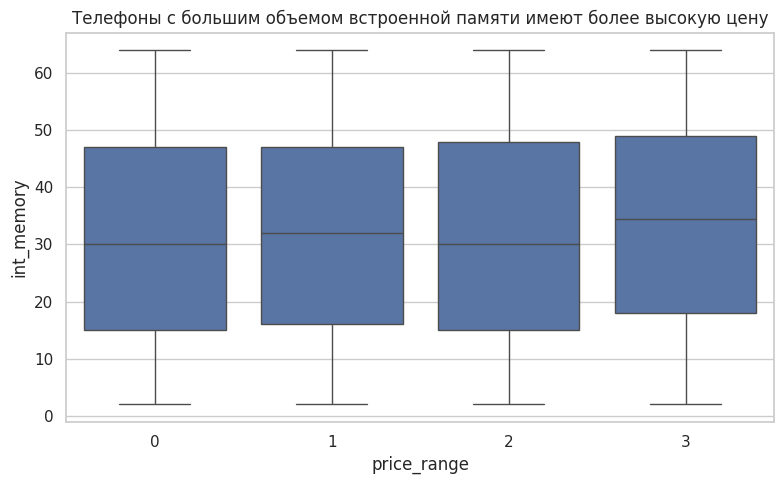

                                            Гипотеза  Статистика  \
0  Телефоны с большей высотой экрана чаще относят...    0.148858   
1  Телефоны с большей шириной экрана имеют более ...    0.165818   
2  Легкие телефоны чаще встречаются среди дорогих...   -0.030302   
3  Телефоны с более высокой плотностью пикселей с...    0.033568   
4      Телефоны с одной SIM-картой чаще стоят дороже    1.286464   
5  Телефоны с лучшей фронтальной камерой стоят до...    0.021998   
6  Телефоны с большим объемом встроенной памяти и...    0.044435   

     P-значение         Результат  
0  2.227806e-11     Подтвердилась  
1  8.478969e-14     Подтвердилась  
2  1.755393e-01  Не подтвердилась  
3  1.334319e-01  Не подтвердилась  
4  7.323497e-01  Не подтвердилась  
5  3.254629e-01  Не подтвердилась  
6  4.693006e-02  Не подтвердилась  


In [6]:
# Проверка последних 7 гипотез
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Загрузка датасета
df = pd.read_csv("mobile_phones.csv")

# Создаем дополнительные признаки
df['screen_resolution'] = df['px_height'] * df['px_width']
df['screen_area'] = df['sc_h'] * df['sc_w']
df['ppi'] = df['screen_resolution'] / (df['screen_area'] + 1)  # +1 чтобы избежать деления на 0

# Настройка визуального стиля
sns.set(style="whitegrid")

# Порог значимости
alpha = 0.05

# Функция для оценки гипотезы
def evaluate_hypothesis(x, y, method):
    if method == 'corr':
        stat, pval = stats.pearsonr(df[x], df[y])
        result = "Подтвердилась" if pval < alpha and abs(stat) >= 0.1 else "Не подтвердилась"
    elif method == 'chi':
        table = pd.crosstab(df[x], df[y])
        stat, pval, _, _ = stats.chi2_contingency(table)
        result = "Подтвердилась" if pval < alpha else "Не подтвердилась"
    return stat, pval, result

# Список из 7 финальных гипотез
final_7_hypotheses = [
    ("Телефоны с большей высотой экрана чаще относятся к более дорогим моделям", 'px_height', 'price_range', 'corr'),
    ("Телефоны с большей шириной экрана имеют более высокую цену", 'px_width', 'price_range', 'corr'),
    ("Легкие телефоны чаще встречаются среди дорогих моделей", 'mobile_wt', 'price_range', 'corr'),
    ("Телефоны с более высокой плотностью пикселей стоят дороже", 'ppi', 'price_range', 'corr'),
    ("Телефоны с одной SIM-картой чаще стоят дороже", 'dual_sim', 'price_range', 'chi'),
    ("Телефоны с лучшей фронтальной камерой стоят дороже", 'fc', 'price_range', 'corr'),
    ("Телефоны с большим объемом встроенной памяти имеют более высокую цену", 'int_memory', 'price_range', 'corr'),
]

# Проверка и визуализация
final_7_results = []

for hypothesis_text, x, y, method in final_7_hypotheses:
    plt.figure(figsize=(8, 5))
    if method == 'corr':
        sns.boxplot(x=y, y=x, data=df)
    else:
        sns.countplot(x=y, hue=x, data=df)
    plt.title(hypothesis_text)
    plt.tight_layout()
    plt.show()

    stat, pval, result = evaluate_hypothesis(x, y, method)
    final_7_results.append((hypothesis_text, stat, pval, result))

# Формируем итоговую таблицу
df_final_7 = pd.DataFrame(final_7_results, columns=["Гипотеза", "Статистика", "P-значение", "Результат"])
print(df_final_7)
